In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Loading the data


In [2]:
df_red=pd.read_csv('winequality-red.csv',sep=';')
df_white=pd.read_csv('winequality-white.csv',sep=';')

In [3]:
df_red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
df_white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

# Preprocessing and visualization of the data


In [5]:
df_red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df_white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
print(df_red.shape)
print(df_white.shape)


(1599, 12)
(4898, 12)


Observations:

1. There are 12 columns, which includes 11 features and 1 output ('quality')
2. Red wine has 1599 samples, and white wine has 4898 samples

Look at the data types of each column

In [8]:
print(df_red.dtypes)
print(df_white.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


Thus, all features are float variables. Only the output variable 'quality' is an integer

Observe the number of unique values, NaN entries, and ranges of each column for Red wine

In [4]:
for col_red in df_red.columns.values: 
    unique_entries = pd.unique(df_red[col_red])
    print(f"The column '{col_red}' has range {unique_entries.min()} to {unique_entries.max()}, has {len(unique_entries)} unique entries, and {df_red[col_red].isnull().sum()} NaN values")

The column 'fixed acidity' has range 4.6 to 15.9, has 96 unique entries, and 0 NaN values
The column 'volatile acidity' has range 0.12 to 1.58, has 143 unique entries, and 0 NaN values
The column 'citric acid' has range 0.0 to 1.0, has 80 unique entries, and 0 NaN values
The column 'residual sugar' has range 0.9 to 15.5, has 91 unique entries, and 0 NaN values
The column 'chlorides' has range 0.012 to 0.611, has 153 unique entries, and 0 NaN values
The column 'free sulfur dioxide' has range 1.0 to 72.0, has 60 unique entries, and 0 NaN values
The column 'total sulfur dioxide' has range 6.0 to 289.0, has 144 unique entries, and 0 NaN values
The column 'density' has range 0.9900700000000001 to 1.00369, has 436 unique entries, and 0 NaN values
The column 'pH' has range 2.74 to 4.01, has 89 unique entries, and 0 NaN values
The column 'sulphates' has range 0.33 to 2.0, has 96 unique entries, and 0 NaN values
The column 'alcohol' has range 8.4 to 14.9, has 65 unique entries, and 0 NaN values

Observe the number of unique values, NaN entries, and ranges of each column for White wine

In [6]:
for col_white in df_white.columns.values: 
    unique_entries = pd.unique(df_white[col_white]) 
    print(f"The column '{col_white}' has range {unique_entries.min()} to {unique_entries.max()}, has {len(unique_entries)} unique entries, and {df_white[col_red].isnull().sum()} NaN values")

The column 'fixed acidity' has range 3.8 to 14.2, has 68 unique entries, and 0 NaN values
The column 'volatile acidity' has range 0.08 to 1.1, has 125 unique entries, and 0 NaN values
The column 'citric acid' has range 0.0 to 1.66, has 87 unique entries, and 0 NaN values
The column 'residual sugar' has range 0.6 to 65.8, has 310 unique entries, and 0 NaN values
The column 'chlorides' has range 0.009000000000000001 to 0.34600000000000003, has 160 unique entries, and 0 NaN values
The column 'free sulfur dioxide' has range 2.0 to 289.0, has 132 unique entries, and 0 NaN values
The column 'total sulfur dioxide' has range 9.0 to 440.0, has 251 unique entries, and 0 NaN values
The column 'density' has range 0.98711 to 1.03898, has 890 unique entries, and 0 NaN values
The column 'pH' has range 2.72 to 3.82, has 103 unique entries, and 0 NaN values
The column 'sulphates' has range 0.22 to 1.08, has 79 unique entries, and 0 NaN values
The column 'alcohol' has range 8.0 to 14.2, has 103 unique e

Observations:


 1) 0 NaN entry in all the columns.
 
 2) Columns have varied ranges.
 
 3) Quality column of redwine and whitewine has 6 and 7 unique entries respectively.
 
 Since the dependent variable of redwine and whitewine dataset has only 6 and 7 unquie entries respectively, Classification  model would fit and predict better on these datasets than Regression model. 
 
 Boxplot and histogram to observe outliers and the type of distribustion every features follow. 

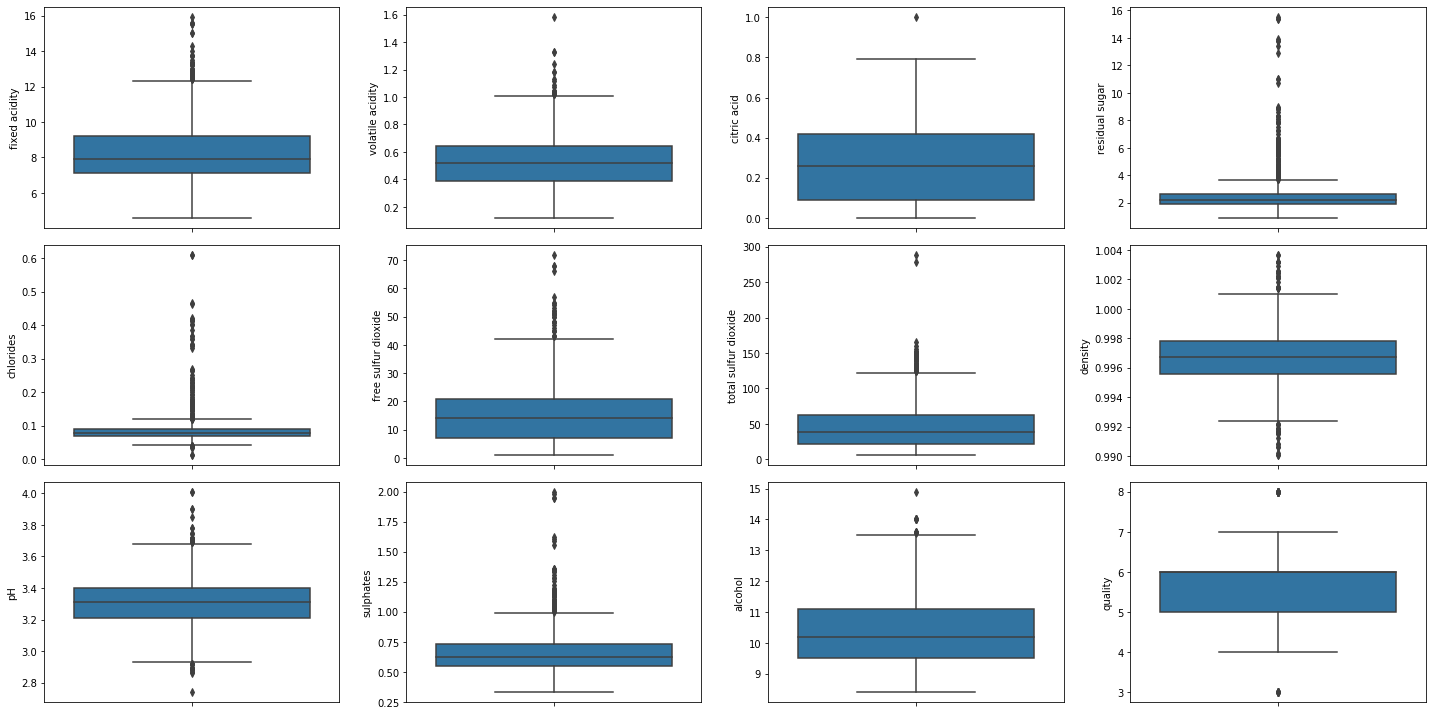

In [9]:
fig,axes=plt.subplots(ncols=4,nrows=3,figsize=(20,10))
index=0
axes=axes.flatten()
for col,value in df_red.items():
    sns.boxplot(y=col,data=df_red,ax=axes[index])
    index+=1
plt.tight_layout()    


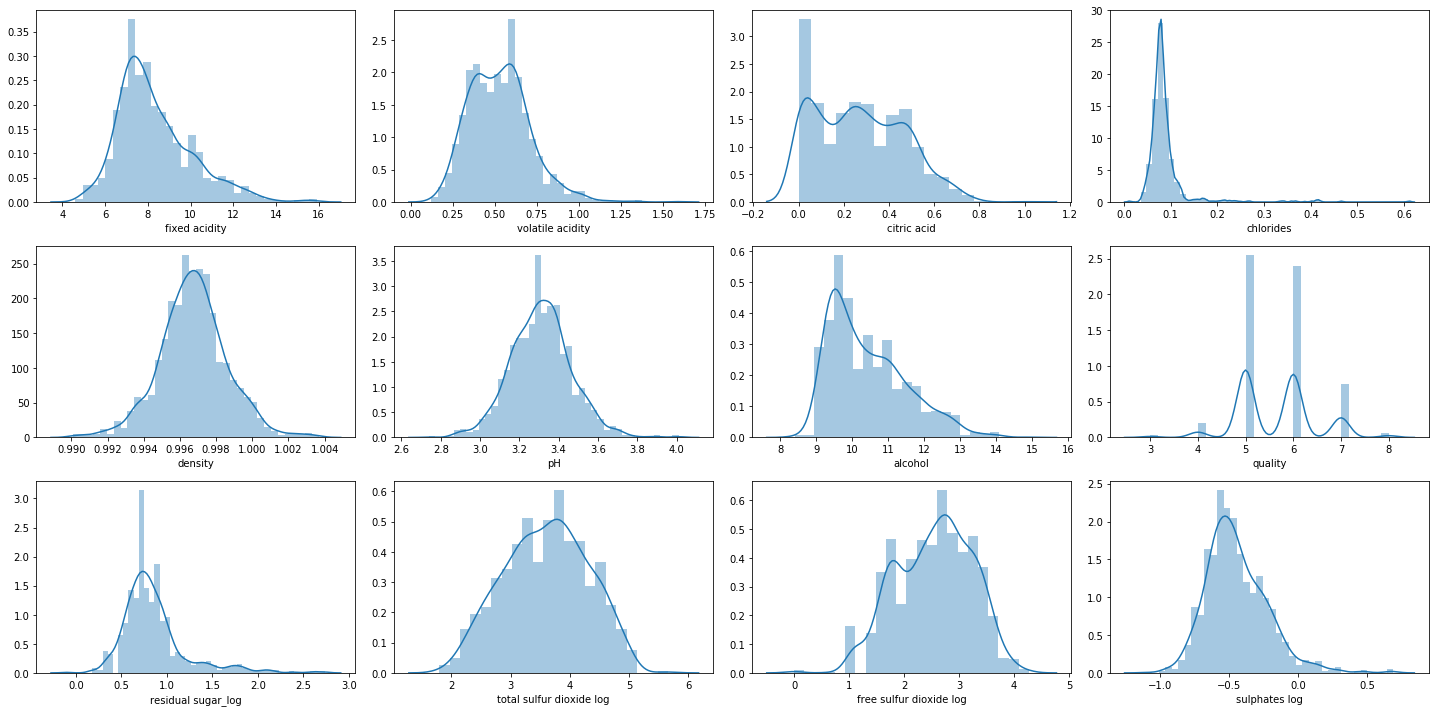

In [163]:
fig,axes=plt.subplots(ncols=4,nrows=3,figsize=(20,10))
index=0
axes=axes.flatten()
for col,value in df_red.items():
    sns.distplot(value,ax=axes[index])
    index+=1
plt.tight_layout() 

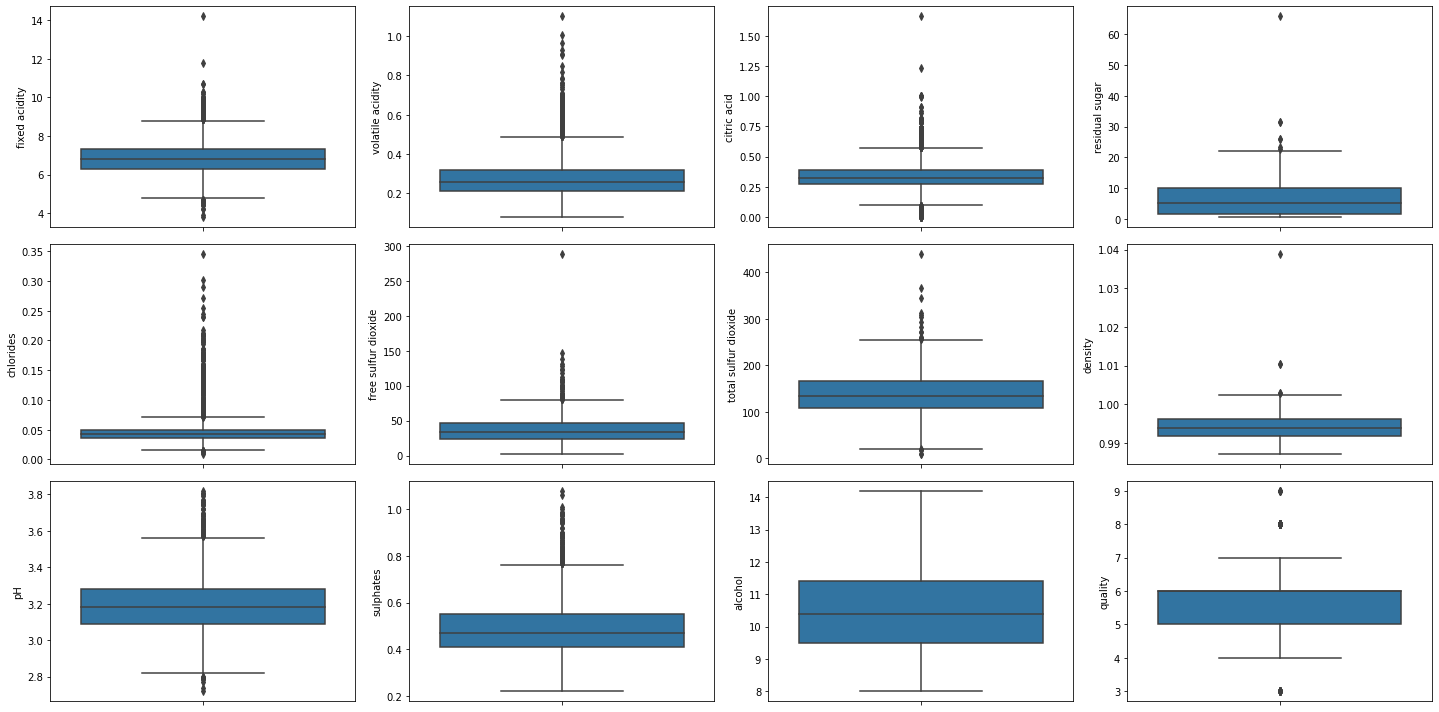

In [11]:
fig,axes=plt.subplots(ncols=4,nrows=3,figsize=(20,10))
index=0
axes=axes.flatten()
for col,value in df_white.items():
    sns.boxplot(y=col,data=df_white,ax=axes[index])
    index+=1
plt.tight_layout() 

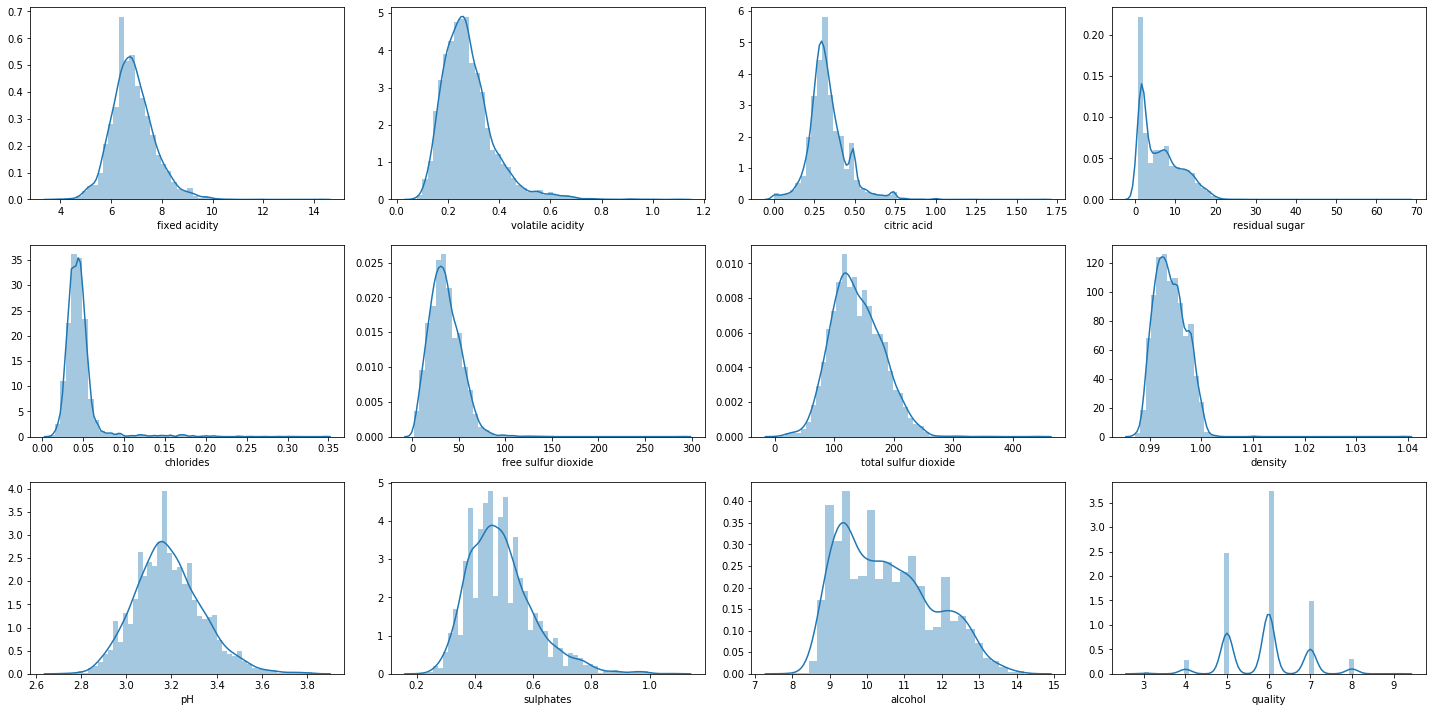

In [12]:
fig,axes=plt.subplots(ncols=4,nrows=3,figsize=(20,10))
index=0
axes=axes.flatten()
for col,value in df_white.items():
    sns.distplot(value,ax=axes[index])
    index+=1
plt.tight_layout() 

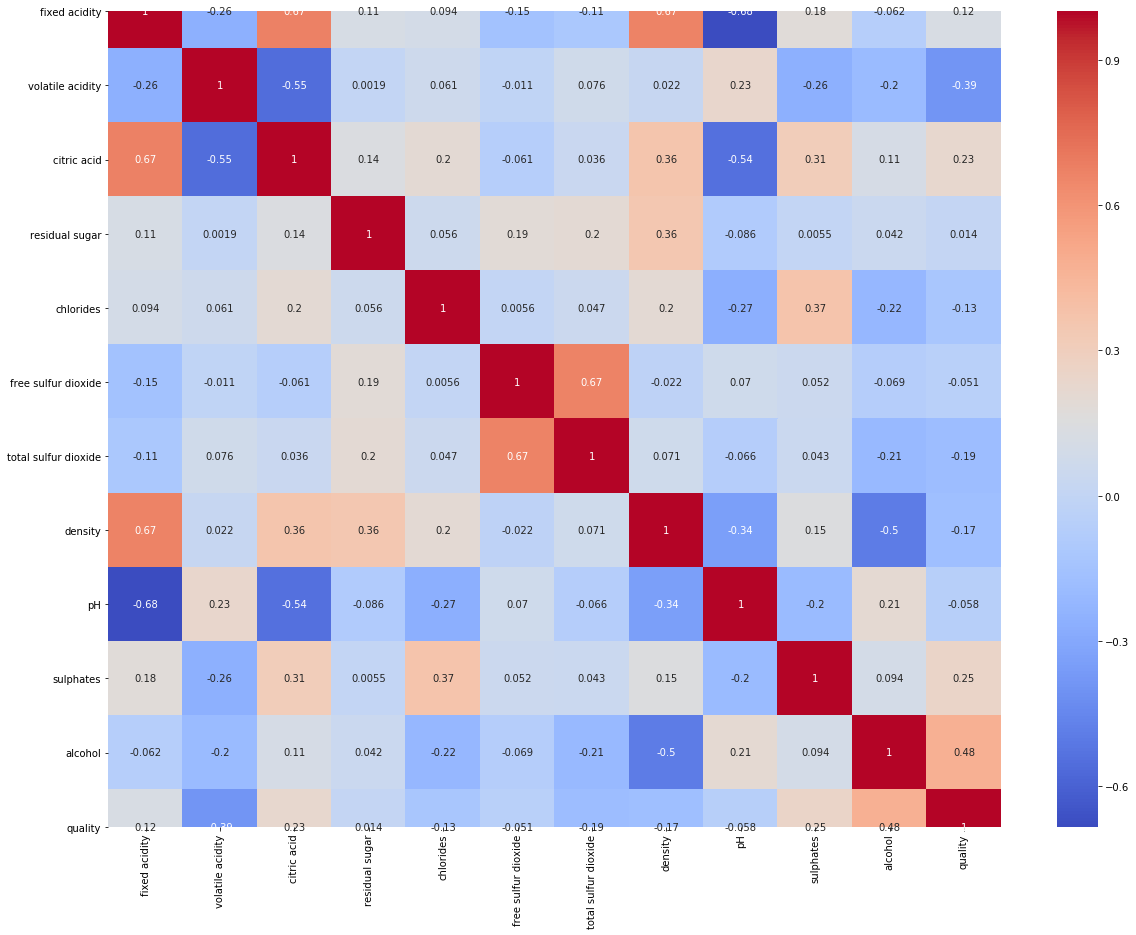

In [13]:
corr=df_red.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True,cmap='coolwarm')

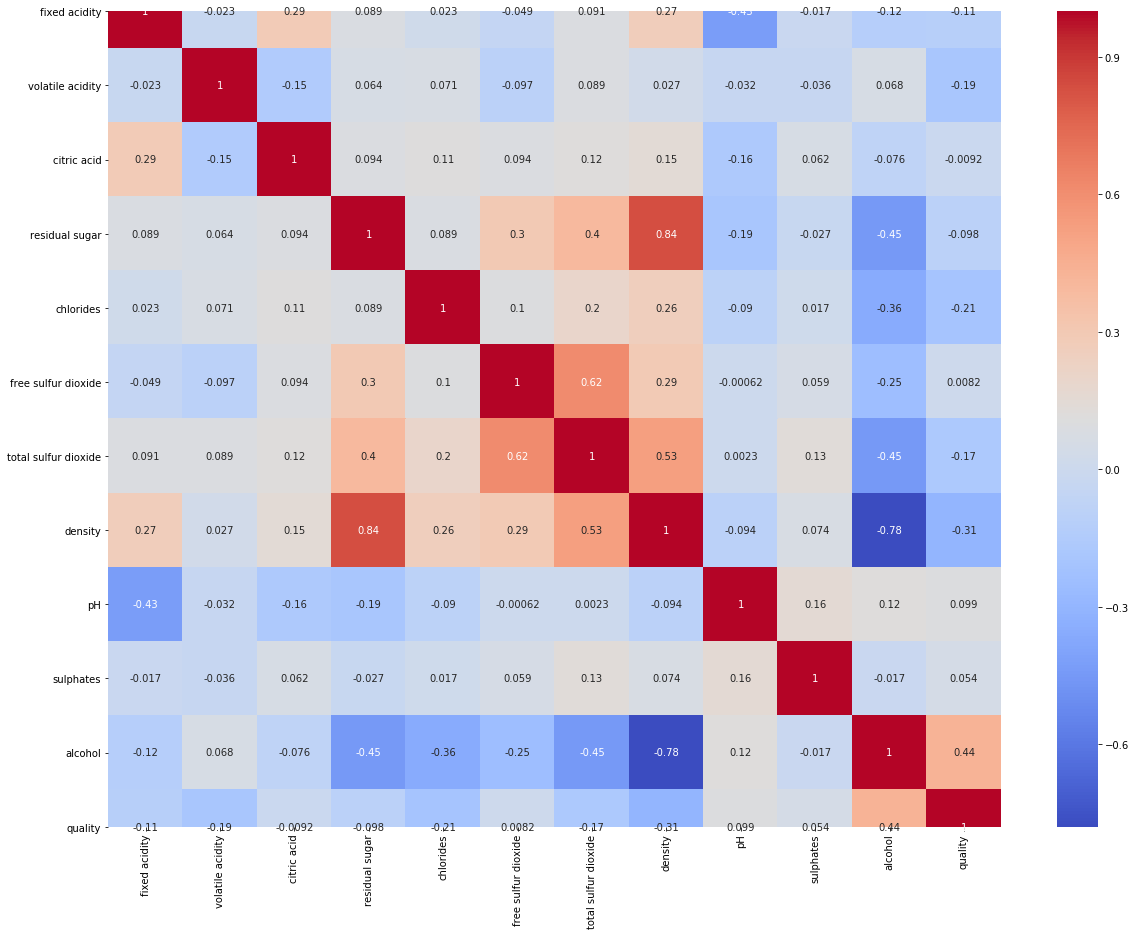

In [14]:
corr=df_white.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [ ]:
red_features=df_red.iloc[:,:-1]
red_target=df_red.iloc[:,-1]

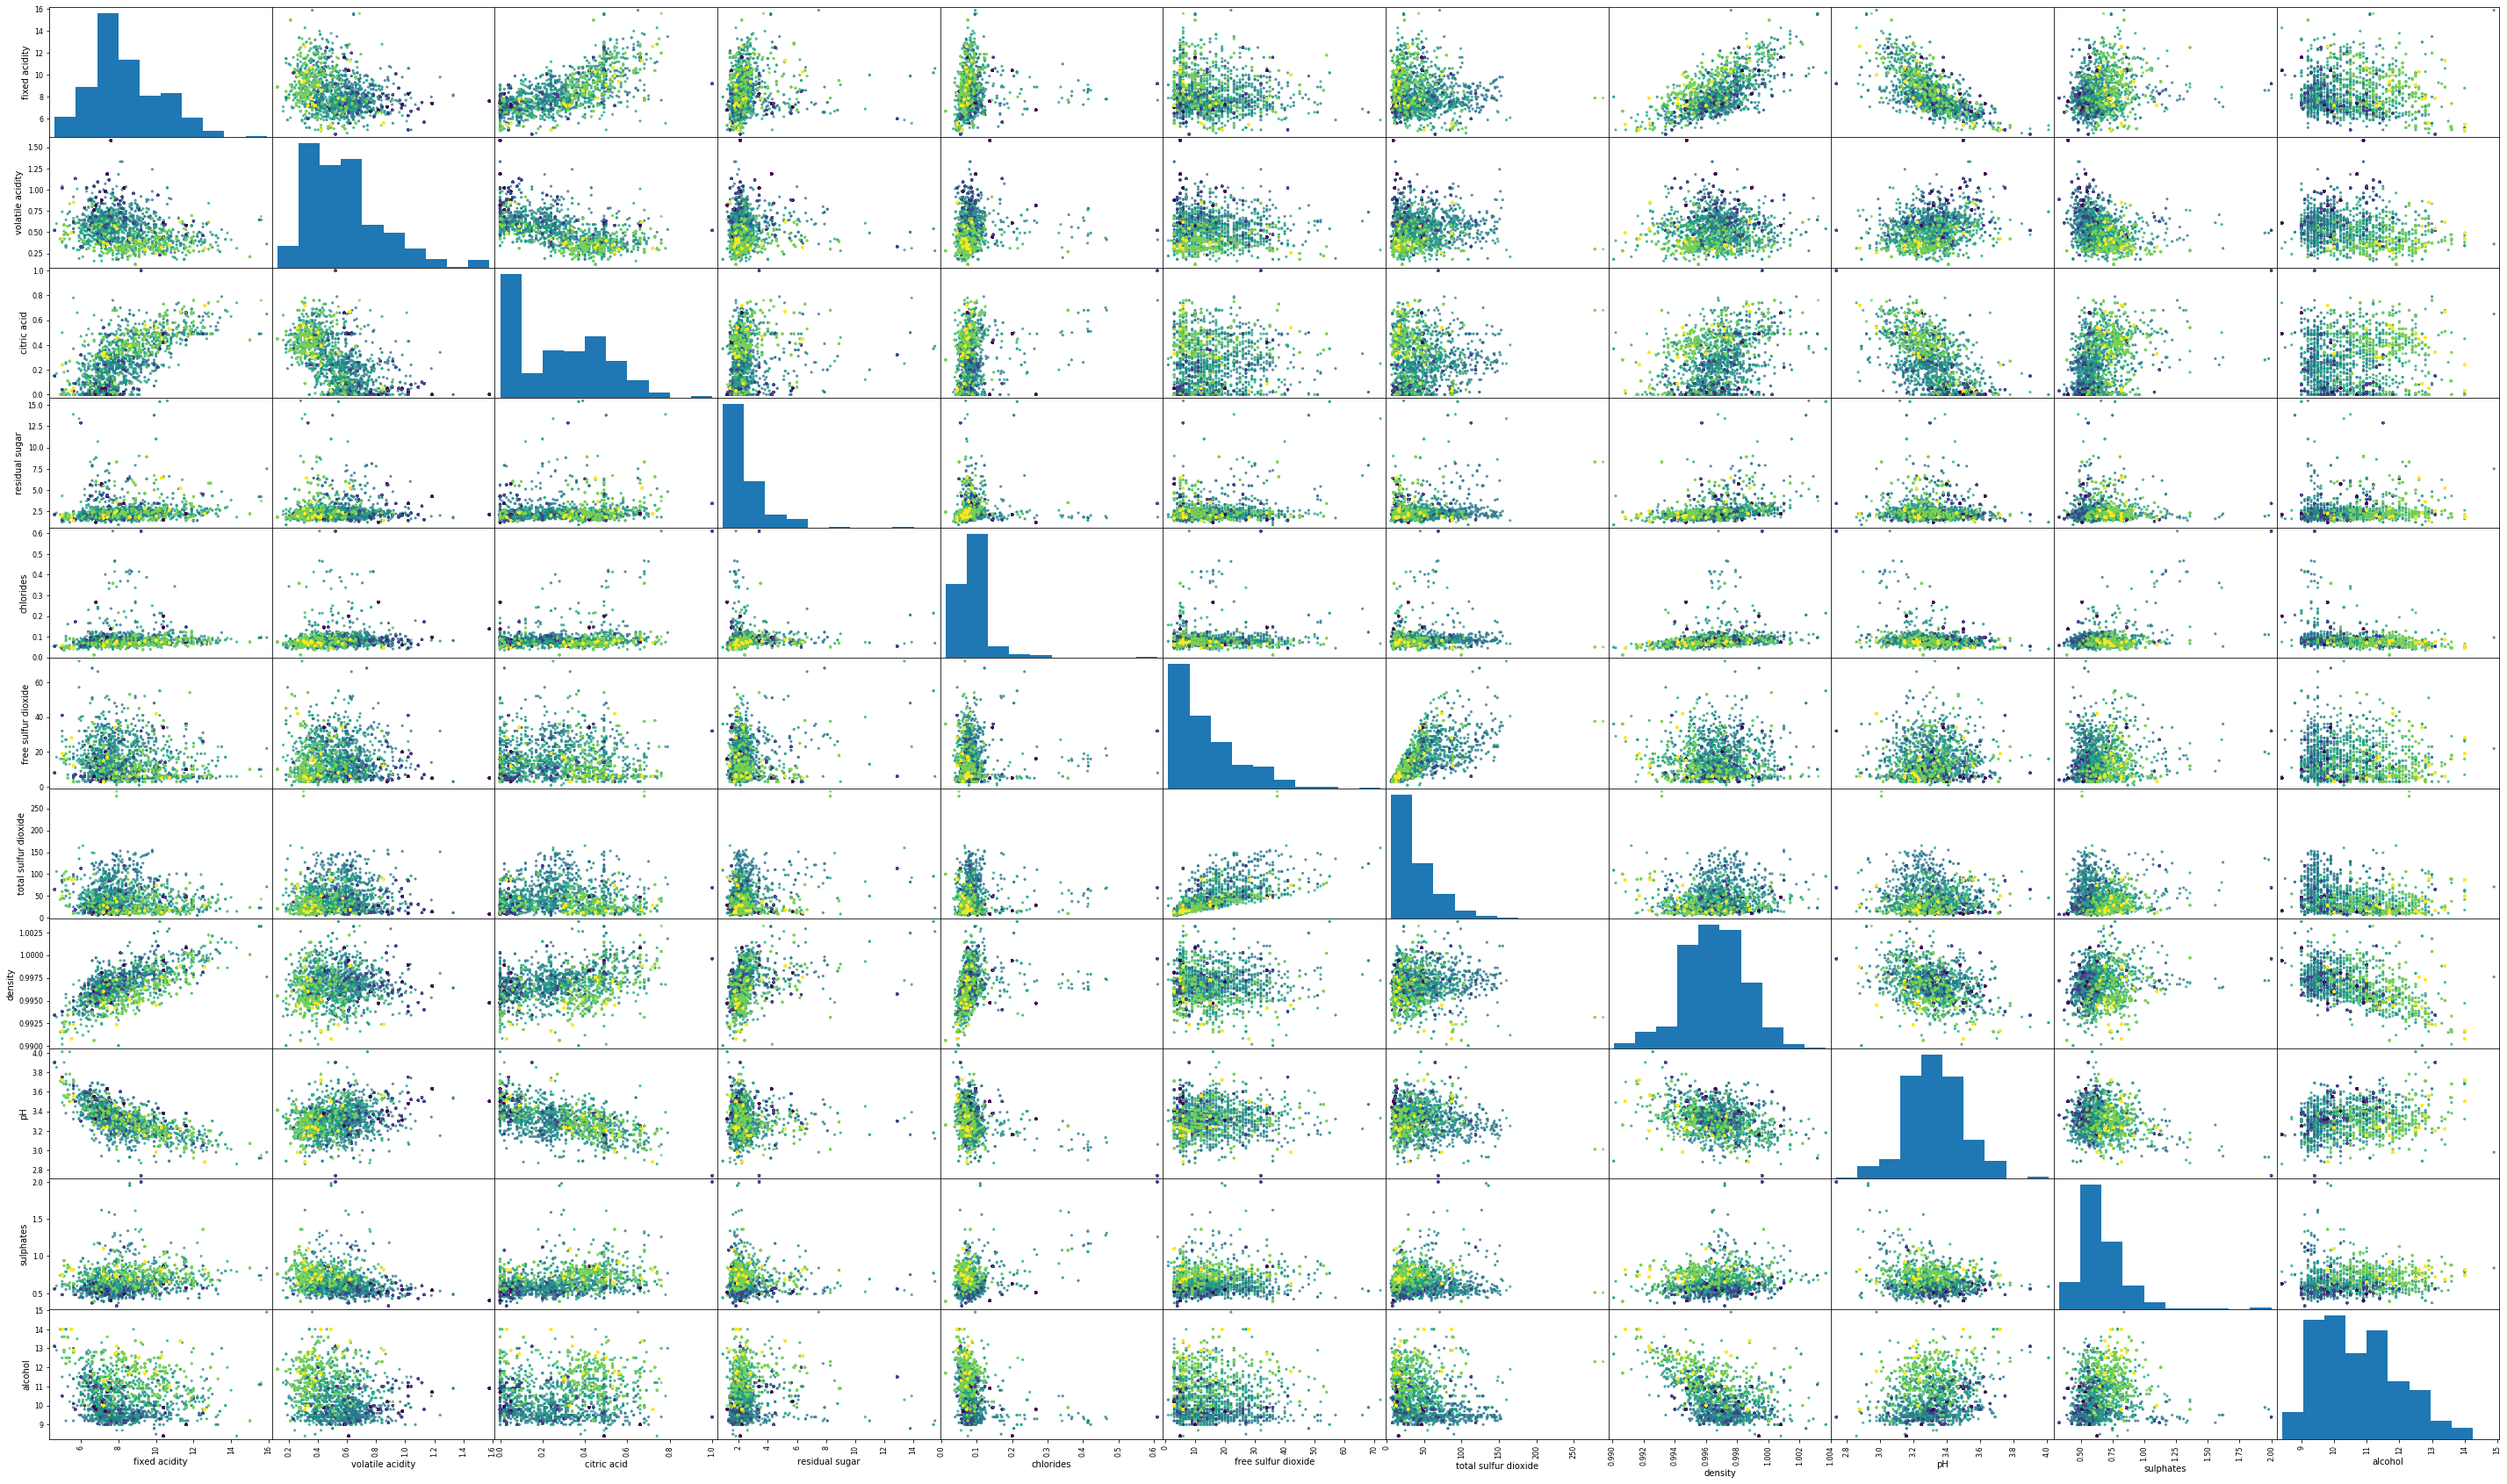

In [136]:
from sklearn import datasets
from pandas.plotting import scatter_matrix
scatter_matrix(red_features, c=red_target,marker='o', s=10,alpha=.8,figsize=(50,30))
plt.show()

In [137]:
white_features=df_white.iloc[:,:-1]
white_target=df_white.iloc[:,-1]

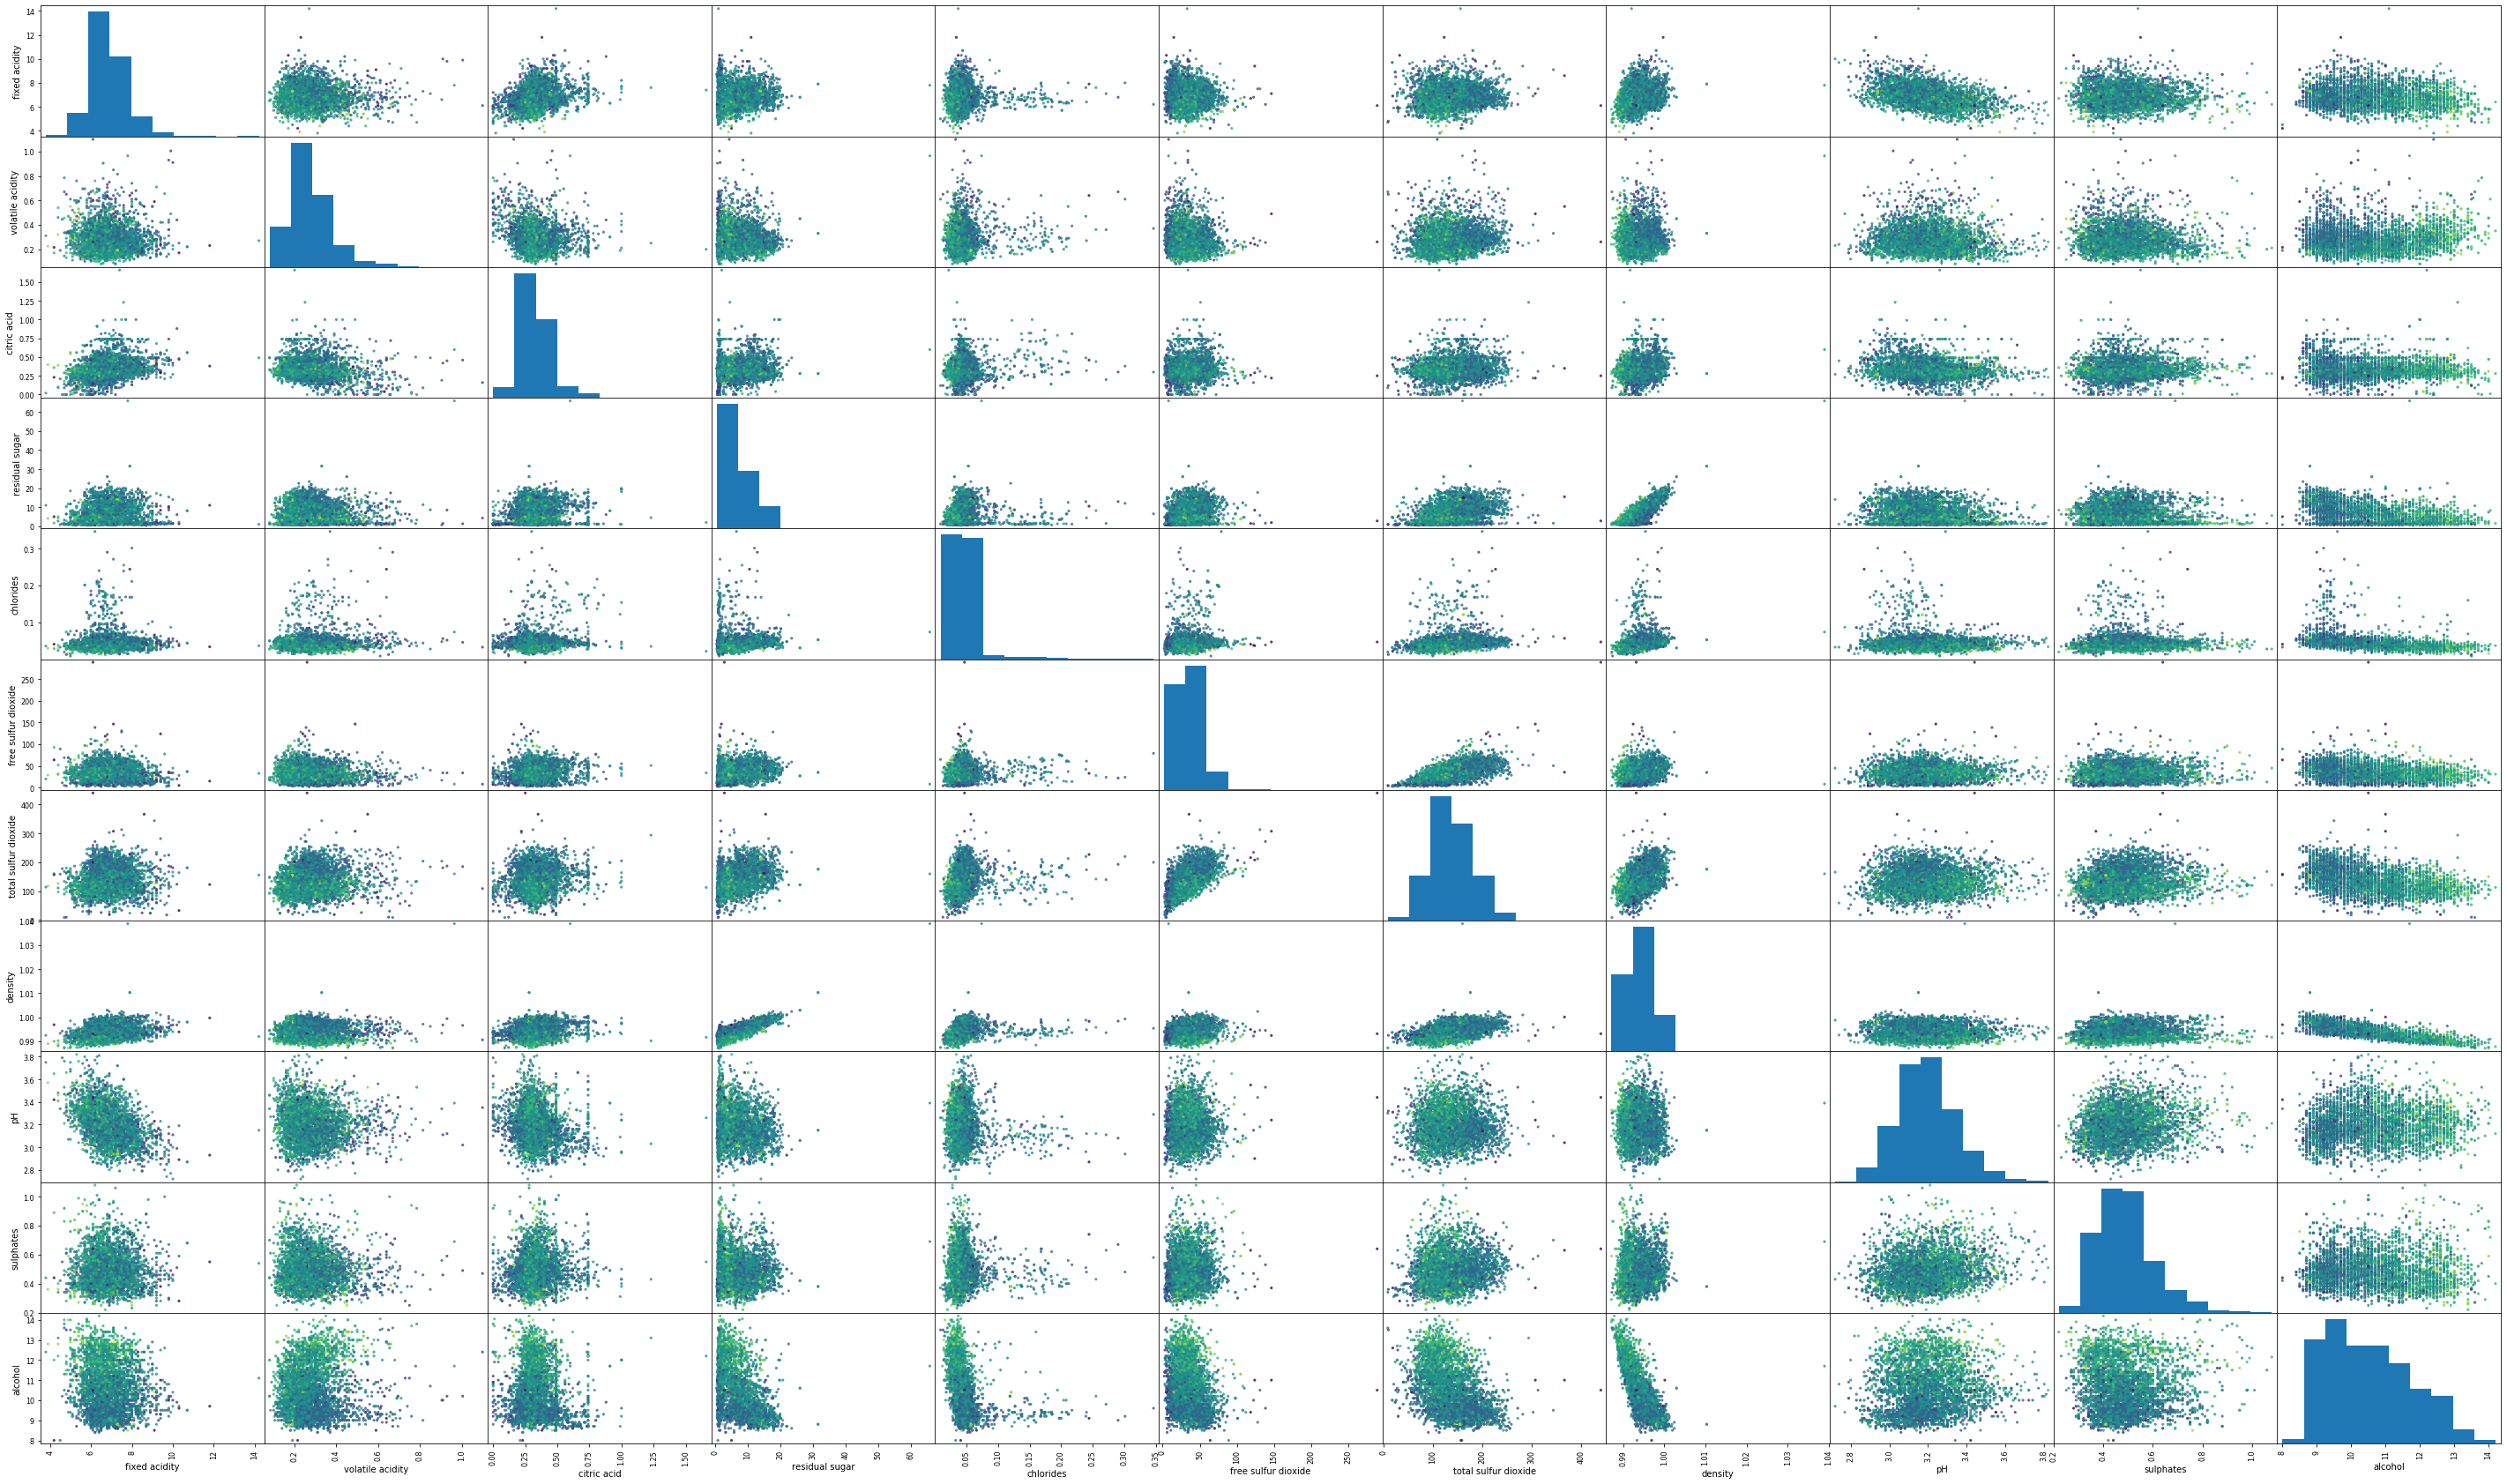

In [138]:
from sklearn import datasets
from pandas.plotting import scatter_matrix
scatter_matrix(white_features, c=white_target,marker='o', s=10,alpha=.8,figsize=(50,30))
plt.show()

# Train and test split


In [3]:
x_red=df_red.drop(['quality'],1)
y_red=df_red['quality']

In [4]:
y_red.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### Treating unbalanced data

In [5]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
x_red,y_red=ros.fit_resample(x_red,y_red)


In [9]:
y_red.value_counts()

7    681
5    681
3    681
8    681
6    681
4    681
Name: quality, dtype: int64

In [188]:
from sklearn.model_selection import train_test_split
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(x_red, y_red, test_size = 0.20, random_state = 0)


In [189]:
y_red_train.value_counts()

3    555
4    554
7    549
8    543
6    536
5    531
Name: quality, dtype: int64

In [190]:
x_white=df_white.iloc[:,:-1]
y_white=df_white.iloc[:,-1]

In [191]:
y_white.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

### Treating unbalanced data

In [192]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
x_white,y_white=ros.fit_resample(x_white,y_white)

In [193]:
from sklearn.model_selection import train_test_split
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(x_white, y_white, test_size = 0.20, random_state = 0)

In [63]:
y_white.value_counts()

7    2198
6    2198
5    2198
4    2198
3    2198
9    2198
8    2198
Name: quality, dtype: int64

# Model training and validation for redwine 

In [194]:
from sklearn.model_selection import cross_val_score
def classify_red(model):
    model=model()
    model.fit(X_red_train,y_red_train)
    score=cross_val_score(model,X_red_train,y_red_train,cv=5)
    print("CV_score:",np.mean(score)*100)
    print("Test_Accurarcy:",model.score(X_red_test,y_red_test)*100)

In [195]:
from sklearn.linear_model import LogisticRegression
classify_red(LogisticRegression)

F:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
F:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

CV_score: 46.0839409734418
Test_Accurarcy: 50.12224938875306


F:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [196]:
from sklearn.svm import SVC
classify_red(SVC)

CV_score: 39.7495445626162
Test_Accurarcy: 41.687041564792175


In [197]:
from sklearn.tree import DecisionTreeClassifier
classify_red(DecisionTreeClassifier)

CV_score: 86.19947454936285
Test_Accurarcy: 87.04156479217605


In [198]:
from sklearn.ensemble import RandomForestClassifier
classify_red(RandomForestClassifier)

CV_score: 90.05498030730902
Test_Accurarcy: 90.2200488997555


In [199]:
from sklearn.ensemble import ExtraTreesClassifier
classify_red(ExtraTreesClassifier)

CV_score: 90.75909352740352
Test_Accurarcy: 91.68704156479217


## Hyperparameter optimization

In [82]:
from sklearn.ensemble import ExtraTreesClassifier
classifier=ExtraTreesClassifier(random_state=49)
classifier.fit(X_red_train,y_red_train)

ExtraTreesClassifier(random_state=49)

In [83]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators= [100, 300, 800, 1200, 1500,2000]
max_depth = [10, 20, 30, 40,50,100,200,300]
criterion= ['entropy','gini']
max_features=['auto', 'sqrt', 'log2']
min_samples_split=[2,5,10,15]
min_samples_leaf=[1,2,5,10,15]
hyperparameter={'n_estimators':n_estimators,'max_depth':max_depth,'criterion':criterion,'max_features':max_features,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}
RS_cv=RandomizedSearchCV(estimator=classifier,param_distributions=hyperparameter,cv=5,n_jobs=4,return_train_score=True,verbose = 4,random_state=50)
RS_cv.fit(X_red_train,y_red_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=49),
                   n_jobs=4,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 20, 30, 40, 50, 100,
                                                      200, 300],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10, 15],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [100, 300, 800, 1200,
                                                         1500, 2000]},
                   random_state=50, return_train_score=True, verbose=4)

In [35]:
RS_cv.best_estimator_

ExtraTreesClassifier(criterion='entropy', max_depth=100, max_features='sqrt',
                     min_samples_split=5, n_estimators=2000, random_state=49)

In [200]:
from sklearn.model_selection import cross_val_score
classifier_red=ExtraTreesClassifier(criterion='entropy', max_depth=100, max_features='sqrt',
                     min_samples_split=5, n_estimators=2000, random_state=49)
classifier_red.fit(X_red_train,y_red_train)
score=cross_val_score(classifier_red,X_red_train,y_red_train,cv=5)
print("CV_score:",np.mean(score)*100)
print("Test_Accurarcy:",classifier_red.score(X_red_test,y_red_test)*100)

CV_score: 90.97325446890615
Test_Accurarcy: 91.56479217603912


In [109]:
from xgboost import XGBClassifier
classify_red(XGBClassifier)

F:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:32:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


F:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:32:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


F:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:32:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


F:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:32:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


F:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:32:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


F:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:32:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accurarcy: 89.24205378973105
CV_score: 89.35124174007521


## ANN training and validation for redwine

In [50]:
y_red_train=pd.get_dummies(y_red_train)

In [51]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=20, activation='softmax',input_dim = 11))
ann.add(tf.keras.layers.Dense(units=10, activation='softmax'))
ann.add(tf.keras.layers.Dense(units=20, activation='softmax'))
ann.add(tf.keras.layers.Dense(units=6, activation='softmax'))
ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
ann.fit(X_red_train.values,y_red_train.values,validation_split=0.20, batch_size = 10, epochs = 1000)

Epoch 1/1000
262/262 [==============================] - 1s 3ms/step - loss: 1.7923 - accuracy: 0.1614 - val_loss: 1.7911 - val_accuracy: 0.1988
Epoch 2/1000
262/262 [==============================] - 1s 2ms/step - loss: 1.7920 - accuracy: 0.1656 - val_loss: 1.7912 - val_accuracy: 0.1682
Epoch 3/1000
262/262 [==============================] - 1s 2ms/step - loss: 1.7911 - accuracy: 0.1711 - val_loss: 1.7906 - val_accuracy: 0.1804
Epoch 4/1000
262/262 [==============================] - 1s 3ms/step - loss: 1.7902 - accuracy: 0.1688 - val_loss: 1.7886 - val_accuracy: 0.1498
Epoch 5/1000
262/262 [==============================] - 1s 2ms/step - loss: 1.7869 - accuracy: 0.1810 - val_loss: 1.7831 - val_accuracy: 0.1865
Epoch 6/1000
262/262 [==============================] - 1s 3ms/step - loss: 1.7798 - accuracy: 0.2138 - val_loss: 1.7726 - val_accuracy: 0.2752
Epoch 7/1000
262/262 [==============================] - 1s 2ms/step - loss: 1.7715 - accuracy: 0.2324 - val_loss: 1.7594 - val_accuracy:

262/262 [==============================] - 1s 3ms/step - loss: 1.1800 - accuracy: 0.5048 - val_loss: 1.1634 - val_accuracy: 0.5183
Epoch 114/1000
262/262 [==============================] - 1s 3ms/step - loss: 1.1710 - accuracy: 0.5223 - val_loss: 1.1785 - val_accuracy: 0.4908
Epoch 115/1000
262/262 [==============================] - 1s 3ms/step - loss: 1.1721 - accuracy: 0.5092 - val_loss: 1.1563 - val_accuracy: 0.5061
Epoch 116/1000
262/262 [==============================] - 1s 3ms/step - loss: 1.1902 - accuracy: 0.5064 - val_loss: 1.1628 - val_accuracy: 0.5076
Epoch 117/1000
262/262 [==============================] - 1s 2ms/step - loss: 1.1616 - accuracy: 0.5211 - val_loss: 1.1605 - val_accuracy: 0.5076
Epoch 118/1000
262/262 [==============================] - 1s 2ms/step - loss: 1.1700 - accuracy: 0.5036 - val_loss: 1.1493 - val_accuracy: 0.5245
Epoch 119/1000
262/262 [==============================] - 1s 3ms/step - loss: 1.1677 - accuracy: 0.5220 - val_loss: 1.1577 - val_accuracy: 

Epoch 225/1000
262/262 [==============================] - 1s 3ms/step - loss: 1.0840 - accuracy: 0.5442 - val_loss: 1.0634 - val_accuracy: 0.5352
Epoch 226/1000
262/262 [==============================] - 1s 3ms/step - loss: 1.0867 - accuracy: 0.5436 - val_loss: 1.0669 - val_accuracy: 0.5199
Epoch 227/1000
262/262 [==============================] - 1s 3ms/step - loss: 1.0883 - accuracy: 0.5582 - val_loss: 1.0651 - val_accuracy: 0.5260
Epoch 228/1000
262/262 [==============================] - 1s 3ms/step - loss: 1.0871 - accuracy: 0.5487 - val_loss: 1.0754 - val_accuracy: 0.5413
Epoch 229/1000
262/262 [==============================] - 1s 2ms/step - loss: 1.0696 - accuracy: 0.5529 - val_loss: 1.0793 - val_accuracy: 0.5581
Epoch 230/1000
262/262 [==============================] - 1s 2ms/step - loss: 1.0752 - accuracy: 0.5726 - val_loss: 1.0603 - val_accuracy: 0.5657
Epoch 231/1000
262/262 [==============================] - 1s 3ms/step - loss: 1.0695 - accuracy: 0.5543 - val_loss: 1.0853 -

262/262 [==============================] - 1s 3ms/step - loss: 1.0269 - accuracy: 0.5845 - val_loss: 1.0353 - val_accuracy: 0.5719
Epoch 338/1000
262/262 [==============================] - 1s 3ms/step - loss: 0.9956 - accuracy: 0.5967 - val_loss: 1.0365 - val_accuracy: 0.5734
Epoch 339/1000
262/262 [==============================] - 1s 2ms/step - loss: 1.0150 - accuracy: 0.5920 - val_loss: 1.0320 - val_accuracy: 0.5810
Epoch 340/1000
262/262 [==============================] - 1s 2ms/step - loss: 0.9822 - accuracy: 0.6031 - val_loss: 1.0197 - val_accuracy: 0.5887
Epoch 341/1000
262/262 [==============================] - 1s 2ms/step - loss: 0.9880 - accuracy: 0.6061 - val_loss: 1.0325 - val_accuracy: 0.5734
Epoch 342/1000
262/262 [==============================] - 1s 2ms/step - loss: 0.9940 - accuracy: 0.6054 - val_loss: 1.0331 - val_accuracy: 0.5734
Epoch 343/1000
262/262 [==============================] - 1s 2ms/step - loss: 0.9990 - accuracy: 0.6082 - val_loss: 1.0246 - val_accuracy: 

262/262 [==============================] - 0s 1ms/step - loss: 0.9502 - accuracy: 0.6139 - val_loss: 0.9671 - val_accuracy: 0.6101
Epoch 450/1000
262/262 [==============================] - 0s 1ms/step - loss: 0.9612 - accuracy: 0.6137 - val_loss: 0.9826 - val_accuracy: 0.6009
Epoch 451/1000
262/262 [==============================] - 0s 1ms/step - loss: 0.9226 - accuracy: 0.6310 - val_loss: 0.9630 - val_accuracy: 0.6162
Epoch 452/1000
262/262 [==============================] - 0s 1ms/step - loss: 0.9615 - accuracy: 0.6167 - val_loss: 0.9597 - val_accuracy: 0.6147
Epoch 453/1000
262/262 [==============================] - 0s 1ms/step - loss: 0.9441 - accuracy: 0.6250 - val_loss: 0.9715 - val_accuracy: 0.6070
Epoch 454/1000
262/262 [==============================] - 0s 1ms/step - loss: 0.9419 - accuracy: 0.6245 - val_loss: 0.9914 - val_accuracy: 0.6101
Epoch 455/1000
262/262 [==============================] - 0s 1ms/step - loss: 0.9709 - accuracy: 0.6132 - val_loss: 0.9991 - val_accuracy: 

262/262 [==============================] - 0s 1ms/step - loss: 0.8783 - accuracy: 0.6526 - val_loss: 0.9377 - val_accuracy: 0.6223
Epoch 562/1000
262/262 [==============================] - 0s 1ms/step - loss: 0.9049 - accuracy: 0.6346 - val_loss: 0.9370 - val_accuracy: 0.6193
Epoch 563/1000
262/262 [==============================] - 0s 1ms/step - loss: 0.9346 - accuracy: 0.6168 - val_loss: 0.9489 - val_accuracy: 0.6116
Epoch 564/1000
262/262 [==============================] - 0s 1ms/step - loss: 0.9079 - accuracy: 0.6134 - val_loss: 0.9540 - val_accuracy: 0.6101
Epoch 565/1000
262/262 [==============================] - 0s 1ms/step - loss: 0.9262 - accuracy: 0.6166 - val_loss: 0.9471 - val_accuracy: 0.6162
Epoch 566/1000
262/262 [==============================] - 0s 1ms/step - loss: 0.9168 - accuracy: 0.6254 - val_loss: 0.9577 - val_accuracy: 0.5902
Epoch 567/1000
262/262 [==============================] - 0s 1ms/step - loss: 0.9505 - accuracy: 0.6025 - val_loss: 0.9536 - val_accuracy: 

Epoch 672/1000
262/262 [==============================] - 0s 1ms/step - loss: 0.8946 - accuracy: 0.6362 - val_loss: 0.9425 - val_accuracy: 0.6284
Epoch 673/1000
262/262 [==============================] - 0s 1ms/step - loss: 0.9077 - accuracy: 0.6404 - val_loss: 0.9349 - val_accuracy: 0.6300
Epoch 674/1000
262/262 [==============================] - 0s 1ms/step - loss: 0.9004 - accuracy: 0.6215 - val_loss: 0.9415 - val_accuracy: 0.6147
Epoch 675/1000
262/262 [==============================] - 0s 1ms/step - loss: 0.9047 - accuracy: 0.6293 - val_loss: 0.9279 - val_accuracy: 0.6101
Epoch 676/1000
262/262 [==============================] - 0s 1ms/step - loss: 0.8966 - accuracy: 0.6226 - val_loss: 0.9198 - val_accuracy: 0.6284
Epoch 677/1000
262/262 [==============================] - 0s 1ms/step - loss: 0.9227 - accuracy: 0.6221 - val_loss: 0.9552 - val_accuracy: 0.6284
Epoch 678/1000
262/262 [==============================] - 0s 1ms/step - loss: 0.9055 - accuracy: 0.6293 - val_loss: 0.9287 -

262/262 [==============================] - 0s 2ms/step - loss: 0.8457 - accuracy: 0.6491 - val_loss: 0.9234 - val_accuracy: 0.6269
Epoch 785/1000
262/262 [==============================] - 0s 1ms/step - loss: 0.8766 - accuracy: 0.6303 - val_loss: 0.9245 - val_accuracy: 0.6376
Epoch 786/1000
262/262 [==============================] - 0s 1ms/step - loss: 0.8557 - accuracy: 0.6447 - val_loss: 0.9093 - val_accuracy: 0.6391
Epoch 787/1000
262/262 [==============================] - 0s 1ms/step - loss: 0.8549 - accuracy: 0.6389 - val_loss: 0.9217 - val_accuracy: 0.6040
Epoch 788/1000
262/262 [==============================] - 0s 1ms/step - loss: 0.8898 - accuracy: 0.6294 - val_loss: 0.9045 - val_accuracy: 0.6361
Epoch 789/1000
262/262 [==============================] - 0s 1ms/step - loss: 0.8791 - accuracy: 0.6324 - val_loss: 0.9237 - val_accuracy: 0.6346
Epoch 790/1000
262/262 [==============================] - 0s 1ms/step - loss: 0.9032 - accuracy: 0.6245 - val_loss: 0.9318 - val_accuracy: 

262/262 [==============================] - 0s 2ms/step - loss: 0.8841 - accuracy: 0.6458 - val_loss: 0.9247 - val_accuracy: 0.6407
Epoch 897/1000
262/262 [==============================] - 0s 1ms/step - loss: 0.8630 - accuracy: 0.6411 - val_loss: 0.9398 - val_accuracy: 0.6177
Epoch 898/1000
262/262 [==============================] - 0s 1ms/step - loss: 0.8308 - accuracy: 0.6625 - val_loss: 0.9318 - val_accuracy: 0.6193
Epoch 899/1000
262/262 [==============================] - 0s 2ms/step - loss: 0.8418 - accuracy: 0.6499 - val_loss: 0.9316 - val_accuracy: 0.6254
Epoch 900/1000
262/262 [==============================] - 0s 1ms/step - loss: 0.8773 - accuracy: 0.6370 - val_loss: 0.9257 - val_accuracy: 0.6223
Epoch 901/1000
262/262 [==============================] - 0s 1ms/step - loss: 0.8300 - accuracy: 0.6554 - val_loss: 0.9111 - val_accuracy: 0.6529
Epoch 902/1000
262/262 [==============================] - 0s 2ms/step - loss: 0.8395 - accuracy: 0.6558 - val_loss: 0.9360 - val_accuracy: 

In [86]:
y_red_test=pd.get_dummies(y_red_test)

In [89]:
loss, acc = ann.evaluate(X_red_test.values, y_red_test.values, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.632


# Model training and validation for whitewine

In [115]:
from sklearn.model_selection import cross_val_score
def classify_white(model):
    model=model()
    model.fit(X_white_train,y_white_train)
    score=cross_val_score(model,X_white_train,y_white_train,cv=5)
    print("CV_score:",np.mean(score)*100)
    print("Test_Accurarcy:",model.score(X_white_test,y_white_test)*100)

In [116]:
from sklearn.ensemble import RandomForestClassifier
classify_white(RandomForestClassifier)

CV_score: 91.98894797838977
Test_Accurarcy: 93.66471734892787


In [117]:
from sklearn.ensemble import ExtraTreesClassifier
classify_white(ExtraTreesClassifier)

CV_score: 92.85829533740156
Test_Accurarcy: 94.05458089668616


In [118]:
from xgboost import XGBClassifier
classify_white(XGBClassifier)

[13:45:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


F:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
F:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:45:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


F:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:45:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


F:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:45:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


F:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:45:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


F:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:45:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CV_score: 91.25766011518107
Test_Accurarcy: 92.5925925925926


## Hyperparameter optimization

In [110]:
from sklearn.ensemble import ExtraTreesClassifier
classifier=ExtraTreesClassifier(random_state=49)
classifier.fit(X_white_train,y_white_train)

ExtraTreesClassifier(random_state=49)

In [111]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators= [100, 300, 800, 1200, 1500,2000]
max_depth = [10, 20, 30, 40,50,100,200,300]
criterion= ['entropy','gini']
max_features=['auto', 'sqrt', 'log2']
min_samples_split=[2,5,10,15]
min_samples_leaf=[1,2,5,10,15]
hyperparameter={'n_estimators':n_estimators,'max_depth':max_depth,'criterion':criterion,'max_features':max_features,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}
RS_cv=RandomizedSearchCV(estimator=classifier,param_distributions=hyperparameter,cv=5,n_jobs=4,return_train_score=True,verbose = 4,random_state=50)
RS_cv.fit(X_white_train,y_white_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=49),
                   n_jobs=4,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 20, 30, 40, 50, 100,
                                                      200, 300],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10, 15],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [100, 300, 800, 1200,
                                                         1500, 2000]},
                   random_state=50, return_train_score=True, verbose=4)

In [112]:
RS_cv.best_estimator_

ExtraTreesClassifier(criterion='entropy', max_depth=100, max_features='sqrt',
                     min_samples_split=5, n_estimators=2000, random_state=49)

In [201]:
from sklearn.model_selection import cross_val_score
classifier_white=ExtraTreesClassifier(criterion='entropy', max_depth=100, max_features='sqrt',
                     min_samples_split=5, n_estimators=2000, random_state=49)
classifier_white.fit(X_white_train,y_white_train)
score=cross_val_score(classifier_white,X_white_train,y_white_train,cv=5)
print("CV_score:",np.mean(score)*100)
print("Test_Accurarcy:",classifier_white.score(X_white_test,y_white_test)*100)

CV_score: 92.79331742527044
Test_Accurarcy: 94.05458089668616


### Out of sample testing

In [204]:
print("CV_Accurarcy of white_wine_test_data on red_wine_data_trained_model :",classifier_red.score(X_white_test,y_white_test)*100)
print("CV_Accurarcy of red_wine_test_data on white_wine_data_trained_model :",classifier_white.score(X_red_test,y_red_test)*100)

CV_Accurarcy of white_wine_test_data on red_wine_data_trained_model : 19.23326835607537
CV_Accurarcy of red_wine_test_data on white_wine_data_trained_model : 27.017114914425427
